In [57]:
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

from voc_dataset import VOCDataset
from torch.utils.data import DataLoader

%matplotlib inline 

In [58]:
# Loading the pre-trained model and setting it to eval mode
model = torchvision.models.resnet50(pretrained=True)
model.fc = torch.nn.Identity()  # Removing the final fc layer
model.eval()

/home/mrsd-lab/.conda/envs/madhu/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/mrsd-lab/.conda/envs/madhu/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [60]:
# dataset loader and random indices
dataset = VOCDataset(split='val', size=224)
indices = np.random.choice(len(dataset), size=1000, replace=False)

In [61]:
# Extract features, labels for each selected image
features = []
labels = []
for i in indices:
    img, label, _ = dataset.__getitem__(i)
    with torch.no_grad():
        feature = model(img.unsqueeze(0))
    features.append(feature.squeeze().numpy())
    labels.append(label)
features = np.array(features)

print("features shape: ", features.shape, "labels shape: ", np.array(labels).shape)

features shape:  (1000, 2048)


In [62]:
# 2D t-SNE projection of the features
tsne = TSNE(n_components=2, perplexity=30, random_state=0)
projections = tsne.fit_transform(features)

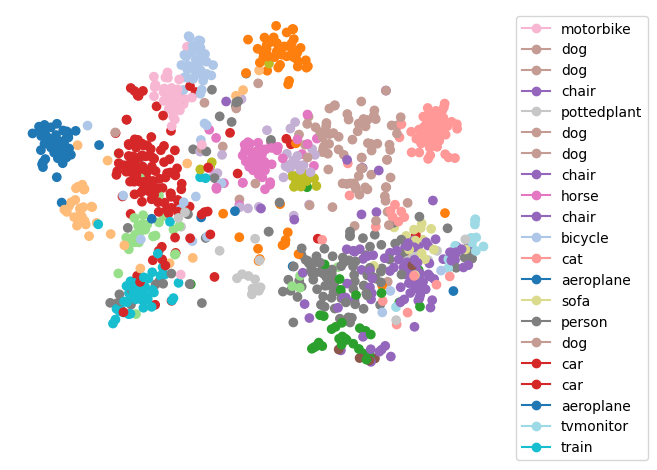

In [72]:
# Compute the GT class of each image and assign a unique color to each object class
classes = []
class_names = []
colors = []

for label in labels:
    classes.append(np.argmax(label))
    class_names.append(dataset.get_class_name(np.argmax(label)))
    colors.append(plt.cm.tab20(classes[-1] % 20))

# Plot the 2D t-SNE projection with each feature color coded by the GT class
plt.scatter(projections[:, 0], projections[:, 1], c=colors)
plt.axis('off')

# Add a legend explaining the mapping from color to object class
legend_elements = [plt.Line2D([0], [0], marker='o', color=colors[i], label=class_names[i]) for i in range(21)]
plt.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(1.3, 1.0))
plt.show()